# Testes de desempenho para JSON, JSONB e TEXT\[\] (PostgreSQL 9.6)

Neste documento, estão descritos testes de desempenho para tipos de dados JSON, JSONB, e TEXT\[\] complementando as séries de testes anteriores. Serão testadas as funcionalidades de full text search do PostgreSQL 9.6, utilizando 18 entrevistas reais.

In [1]:
# Imports
import psycopg2
from psycopg2.extras import Json
from random import randint
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import getpass

In [2]:
# Estabilishing connection to database
conn = psycopg2.connect("host=35.192.163.239 port=5432 dbname=testdb user=%s password=%s" % (input("User: "), getpass.getpass("Password: ")))
cur = conn.cursor()

In [3]:
# Analyzing table sizes
cur.execute("""SELECT PG_SIZE_PRETTY(PG_TOTAL_RELATION_SIZE('JSONTEST'))""")
print('JSONTEST SIZE: ',cur.fetchall()[0][0])
cur.execute("""SELECT PG_SIZE_PRETTY(PG_TOTAL_RELATION_SIZE('JSONBTEST'))""")
print('JSONBTEST SIZE:', cur.fetchall()[0][0])
cur.execute("""SELECT PG_SIZE_PRETTY(PG_TOTAL_RELATION_SIZE('TEXTARRTEST'))""")
print('TEXTARRTEST SIZE:', cur.fetchall()[0][0])

JSONTEST SIZE:  1504 kB
JSONBTEST SIZE: 1488 kB
TEXTARRTEST SIZE: 1576 kB


## Testes de desempenho para os tipos de dados JSON, JSONB e TEXT\[\]

In [4]:
# Preparing for N queries
times = []
labels = []

N = 1000

In [5]:
# Recovering available IDs
cur = conn.cursor()
cur.execute("""SELECT ID FROM TEXTARRTEST ORDER BY ID ASC;""")
ids = cur.fetchall()
ids = [i[0] for i in ids]

In [6]:
# Accessing  an entire tuple of JSONBTEST
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT * FROM JSONBTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSONB entire row")

# Accessing  an entire tuple of JSONTEST
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT * FROM JSONTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSON entire row")

# Accessing  an entire tuple of TEXT[]
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT * FROM TEXTARRTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("TEXT[] entire row")

In [7]:
# Accessing an entire JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT INTERVIEW FROM JSONBTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSONB entire object")

# Accessing an entire JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT INTERVIEW FROM JSONTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSON entire object")

# Accessing an entire TEXT[] data
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT TEXTO, PERGUNTAS, RESPOSTAS FROM TEXTARRTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("TEXT[] entire object")

In [8]:
# Accessing 'text' from a JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT INTERVIEW->'text' FROM JSONBTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSONB 'text'")

# Accessing 'text' from a JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT INTERVIEW->'text' FROM JSONTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids))-1]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSON 'text'")

# Accessing 'text' from a TEXT[]
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT TEXTO FROM TEXTARRTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("TEXT[] 'text'")

In [9]:
# Accessing 'bold' from a JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT INTERVIEW->'bold' FROM JSONBTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSONB 'bold'")

# Accessing 'bold' from a JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT INTERVIEW->'bold' FROM JSONTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSON 'bold'")

# Accessing 'bold' from a TEXT[]
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT PERGUNTAS FROM TEXTARRTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("TEXT[] 'bold'")

In [10]:
# Accessing 'nonbold' from a JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT INTERVIEW->'nonbold' FROM JSONBTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSONB 'nonbold'")

# Accessing 'nonbold' from a JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT INTERVIEW->'nonbold' FROM JSONTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("JSON 'nonbold'")

# Accessing 'nonbold' from a TEXT[]
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT RESPOSTAS FROM TEXTARRTEST WHERE ID = %(int)s;""", {'int': ids[randint(0, len(ids)-1)]})
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times.append(aux)
labels.append("TEXT[] 'nonbold'")

In [11]:
# Accessing entire table JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT * FROM JSONBTEST;""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[2][0])[0]))
times.append(aux)
labels.append("JSONB *")

# Accessing entire table JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT * FROM JSONTEST;""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[2][0])[0]))
times.append(aux)
labels.append("JSON *")

# Accessing entire table TEXT[]
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT * FROM TEXTARRTEST;""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[2][0])[0]))
times.append(aux)
labels.append("TEXT[] *")

In [12]:
print('Average access times (ms): ')
for i in range(len(times)):
    print(labels[i], '%.5f' % (sum(times[i])/N),sep='\t\t')

Average access times (ms): 
JSONB entire row		0.08452
JSON entire row		0.08678
TEXT[] entire row		0.09090
JSONB entire object		0.08684
JSON entire object		0.08738
TEXT[] entire object		0.08693
JSONB 'text'		0.08481
JSON 'text'		0.08359
TEXT[] 'text'		0.08684
JSONB 'bold'		0.08397
JSON 'bold'		0.08344
TEXT[] 'bold'		0.08256
JSONB 'nonbold'		0.08802
JSON 'nonbold'		0.08613
TEXT[] 'nonbold'		0.08525
JSONB *		0.03432
JSON *		0.03362
TEXT[] *		0.04757


[]

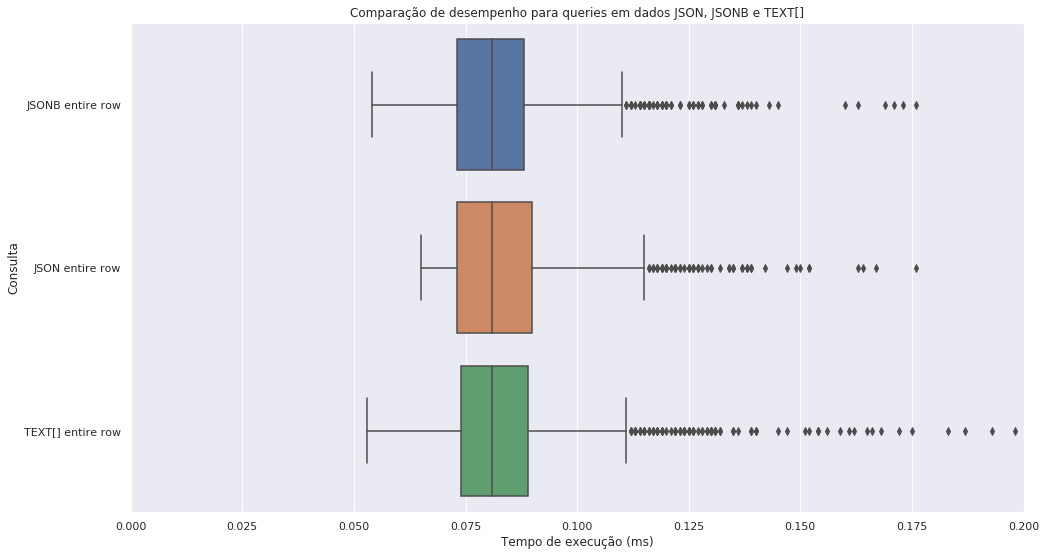

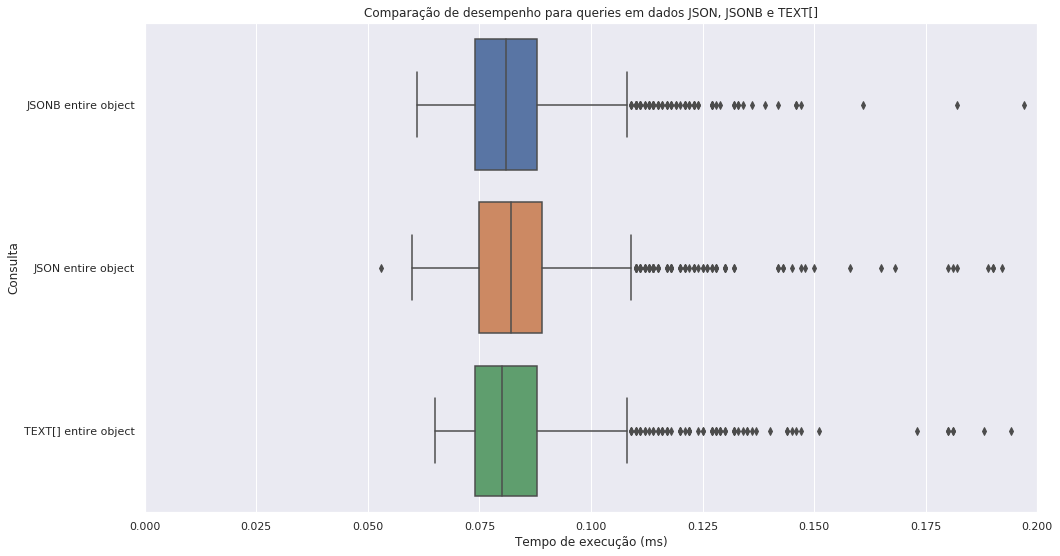

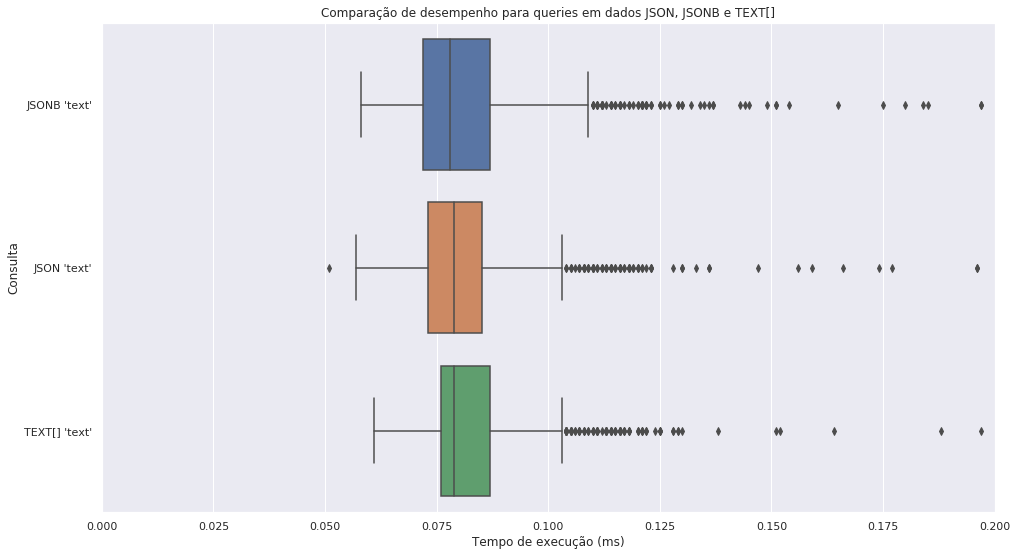

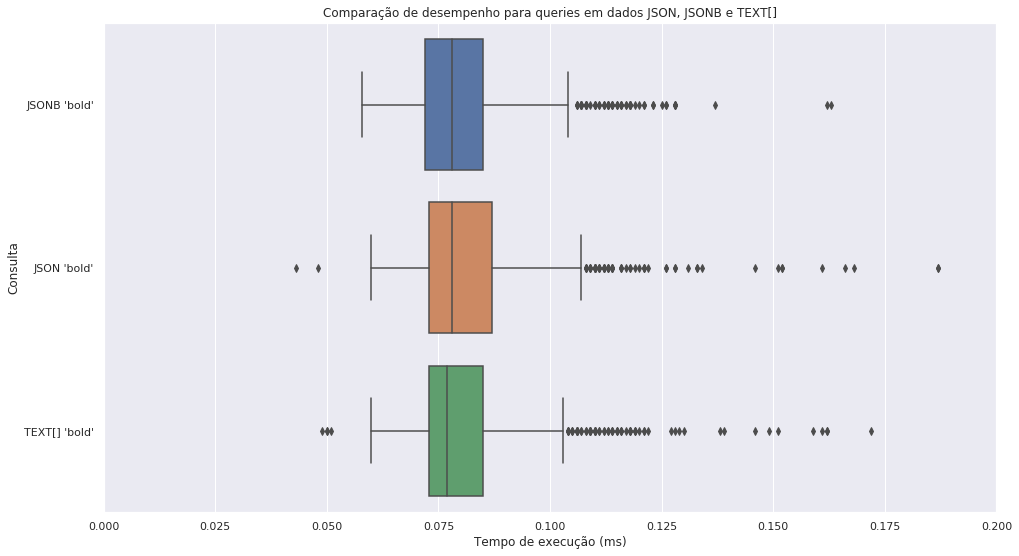

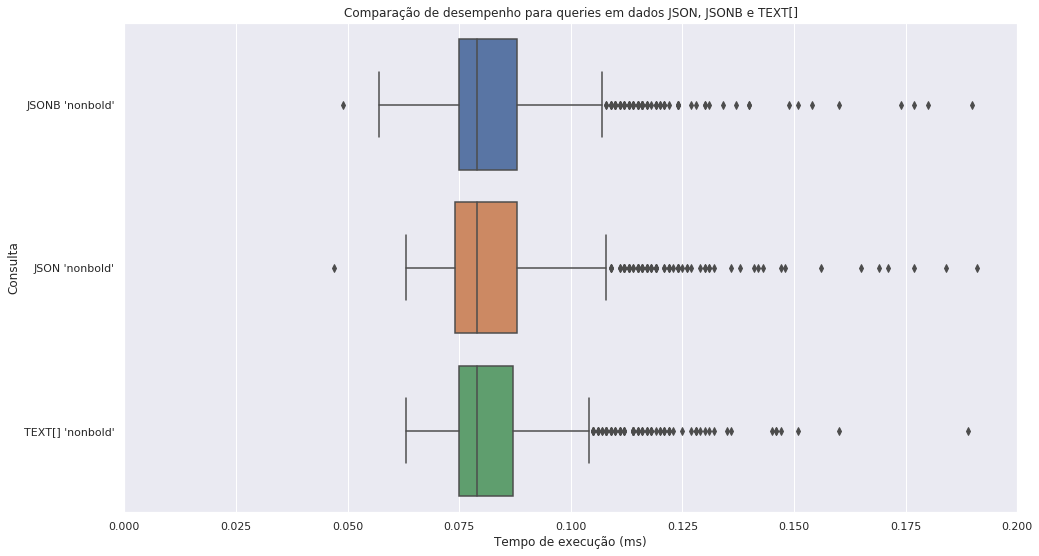

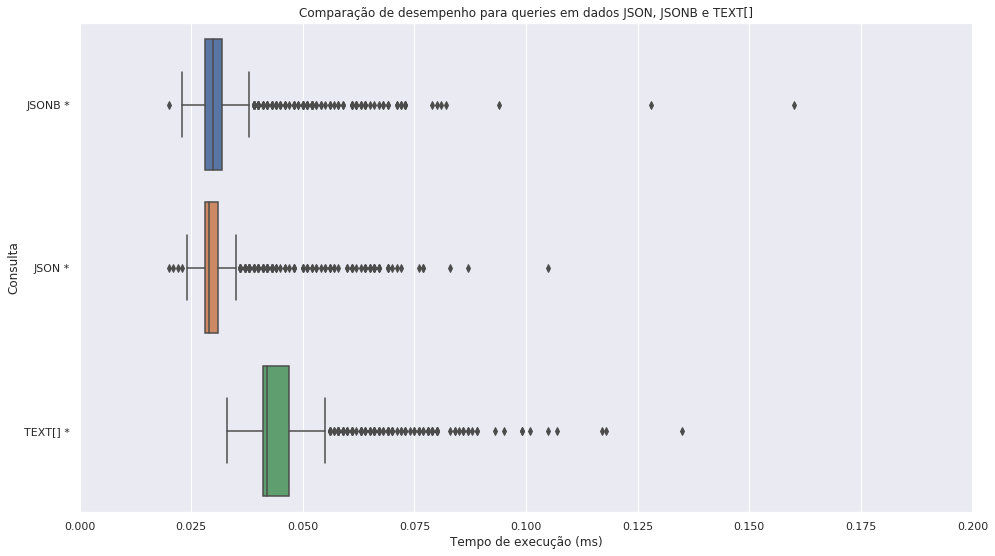

In [13]:
# Graph comparison

sns.set()
plt.figure(figsize=(16, 9))
sns.boxplot(x=times[0:3], y=labels[0:3])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[]")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

sns.set()
plt.figure(figsize=(16, 9))
sns.boxplot(x=times[3:6], y=labels[3:6])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[]")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

sns.set()
plt.figure(figsize=(16, 9))
sns.boxplot(x=times[6:9], y=labels[6:9])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[]")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

sns.set()
plt.figure(figsize=(16, 9))
sns.boxplot(x=times[9:12], y=labels[9:12])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[]")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

sns.set()
plt.figure(figsize=(16, 9))
sns.boxplot(x=times[12:15], y=labels[12:15])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[]")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

sns.set()
plt.figure(figsize=(16, 9))
sns.boxplot(x=times[15:18], y=labels[15:18])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[]")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

## Testes de desempenho para busca por termos

Para exemplificar, as consultas a seguir retornam todas as tuplas cuja a *string* "Londrina" é existente nos elementos *text*, *bold* e *nonbold*. Neste caso, todas as tuplas das tabelas de testes são retornadas após a verificação.

In [14]:
# Preparing for N queries
times2 = []
labels2 = []

N = 1000

In [15]:
# TERM SEARCH 'text' JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONBTEST JBT WHERE INTERVIEW->>'text' LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSONB 'text' TERM SEARCH")

# TERM SEARCH 'text' JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONTEST JT WHERE INTERVIEW->>'text' LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSON 'text' TERM SEARCH")

# TERM SEARCH 'text' TEXTARRTEST
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM TEXTARRTEST WHERE TEXTO LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("TEXT[] 'text' TERM SEARCH")

In [16]:
# TERM SEARCH 'bold' JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONBTEST JBT WHERE INTERVIEW->>'bold' LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSONB 'bold' TERM SEARCH")

# TERM SEARCH 'bold' JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONTEST JT WHERE INTERVIEW->>'bold' LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSON 'bold' TERM SEARCH")

# TERM SEARCH 'bold' TEXTARRTEST
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM TEXTARRTEST WHERE array_to_string(PERGUNTAS, '|') LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("TEXT[] 'bold' TERM SEARCH")

In [17]:
# TERM SEARCH 'nonbold' JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONBTEST JBT WHERE INTERVIEW->>'nonbold' LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSONB 'nonbold' TERM SEARCH")

# TERM SEARCH 'nonbold' JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONTEST JT WHERE INTERVIEW->>'nonbold' LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSON 'nonbold' TERM SEARCH")

# TERM SEARCH 'nonbold' TEXTARRTEST
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM TEXTARRTEST WHERE array_to_string(RESPOSTAS, '|') LIKE '%Londrina%';""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("TEXT[] 'nonbold' TERM SEARCH")

In [18]:
print('Average access times (ms): ')
for i in range(len(times2)):
    print(labels2[i], '%.5f' % (sum(times2[i])/N),sep='\t\t')

Average access times (ms): 
JSONB 'text' TERM SEARCH		0.06677
JSON 'text' TERM SEARCH		0.06892
TEXT[] 'text' TERM SEARCH		0.07188
JSONB 'bold' TERM SEARCH		0.07225
JSON 'bold' TERM SEARCH		0.06822
TEXT[] 'bold' TERM SEARCH		0.06855
JSONB 'nonbold' TERM SEARCH		0.07062
JSON 'nonbold' TERM SEARCH		0.06898
TEXT[] 'nonbold' TERM SEARCH		0.06840


[]

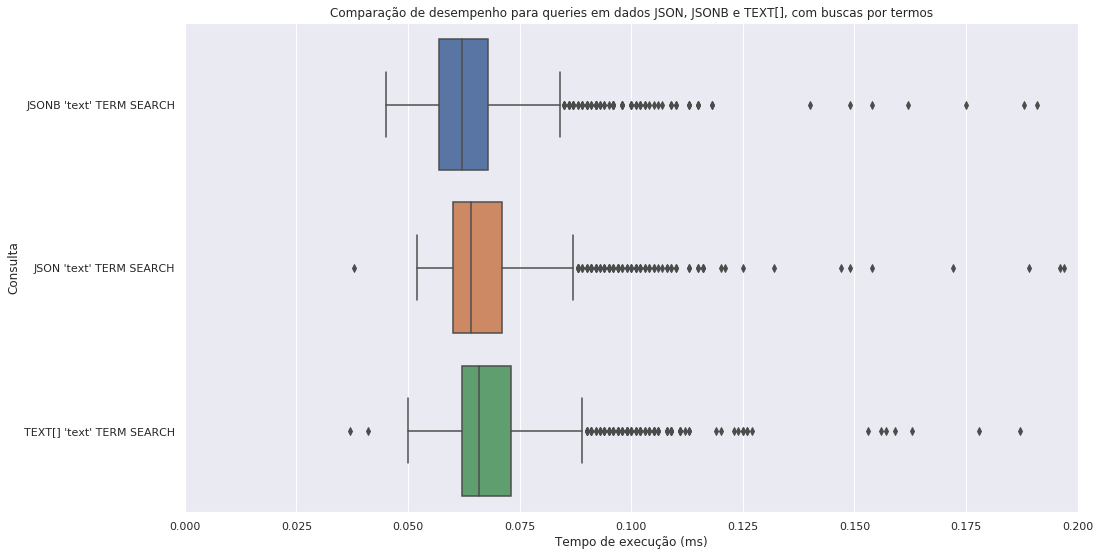

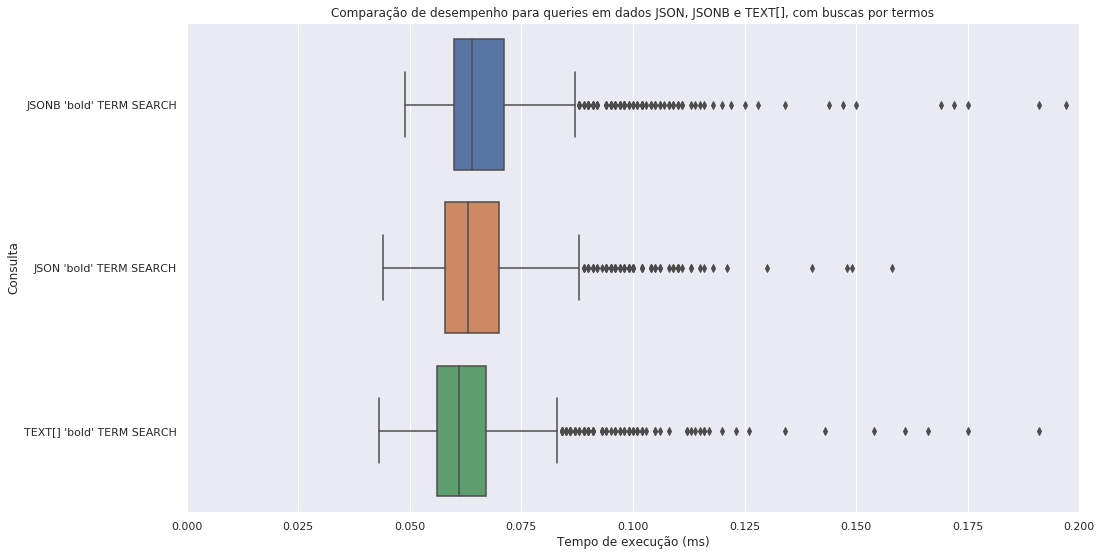

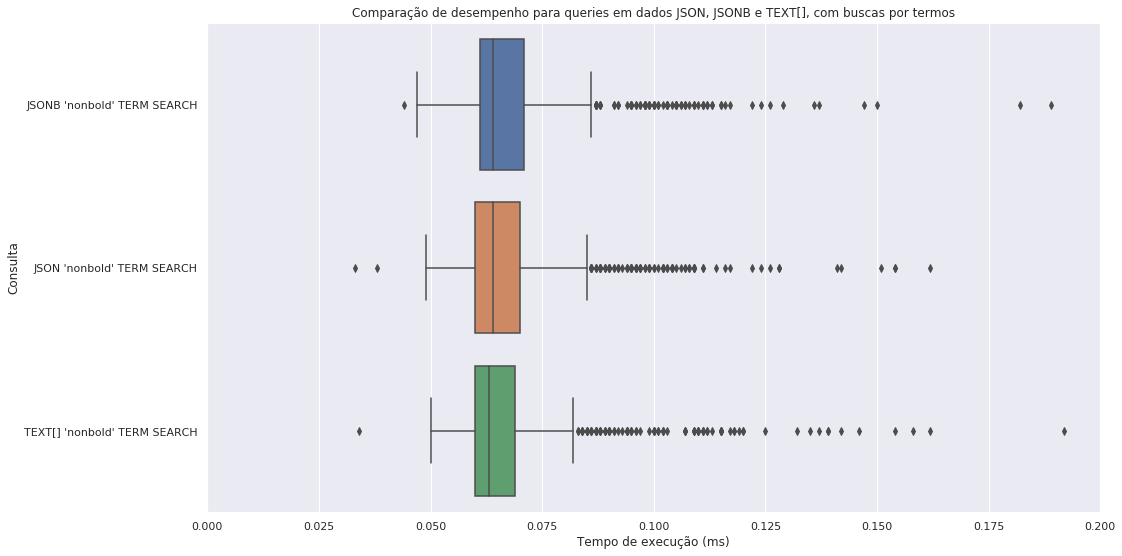

In [19]:
# Graph comparison

sns.set()
plt.figure(figsize=(16, 9))
sns.boxplot(x=times2[0:3], y=labels2[0:3])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[], com buscas por termos")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()
sns.set()

plt.figure(figsize=(16, 9))
sns.boxplot(x=times2[3:6], y=labels2[3:6])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[], com buscas por termos")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

plt.figure(figsize=(16, 9))
sns.boxplot(x=times2[6:9], y=labels2[6:9])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[], com buscas por termos")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

## Testes de desempenho para busca por termos, utilizando recursos de Full Text Search

Utilizaremos as funções de full text search do PostgreSQL 9.6, comparando o desempenho e qualidade destas buscas com os resultados anteriores.

In [20]:
# Preparing for N queries
times2 = []
labels2 = []

N = 1000

In [21]:
# Example of document pre-processing
cur = conn.cursor()
cur.execute("""SELECT ID, to_tsvector('portuguese', TEXTO) FROM TEXTARRTEST;""")
print(cur.fetchone()[1], sep='\n')

'0':5410 '06':820 '1':6709,6715 '10':1659,2830,3431 '100':6518 '10º':5606 '12º':3000 '14':577,607,6984 '14º':601 '15':1322,2008,7253 '1989':318 '1991':562 '1995':429 '2':5115 '20':3263 '2000':2039,2046 '2001':2237,2256 '2003':2462,2482,2501 '2004':2258 '2010':3212,3486 '2011':3237,3776,4086,4552,4761 '2016':4803,4965,4979,5009 '21':1363,1367,1375,1395 '22':1355,1396,3264 '23':1999,2006,3265 '24':821,4209,4223 '24º':4226 '25':3425 '26º':4213 '3':2522 '4':2280,4862,5736 '48':6723 '6':3987,4065,4109 '60':6710 '68':6716 '7':276,4111 '8':34,50,277,2004,4859,4872,6207 '8º':3051 '91':610,653,685 '94':705 '95':504,712 '98':1006,1063 '99':784,1372,2493 'abaix':3042,3061,6630 'abob':1549 'abri':1883,1888 'abriu':4234 'absolut':2489 'acab':1027,1068,1694,1767,1822,1909,1943,1947,2571,2776,2787,2886,2997,3034,3053,3393,3560,3561,3733,3836,4366,4451,4774,4888,5120,5187,5848,5992,6550,6849,7031 'acert':1612,6791 'acho':313,1478,2149,3111,5240,5480,5714,5738,5834,6000,6178,6225,6432,6492,6664,6819,68

In [22]:
# Example result of ts_headline function
cur = conn.cursor()
cur.execute("""SELECT ID, ts_rank(to_tsvector('portuguese', TEXTO), phraseto_tsquery('portuguese', %(query)s), 32|16|1) AS RANK,
                ts_headline('portuguese', TEXTO, plainto_tsquery('portuguese', %(query)s)) AS HEADLINE 
            FROM TEXTARRTEST ORDER BY RANK DESC;""",
            {'query': 'Nasci em Londrina'})
print(*cur.fetchall(), sep='\n')

(22, 0.00224137, '<b>nasceu</b>.\nTá, eu sou aqui de <b>Londrina</b>, <b>nasci</b> em <b>Londrina</b>, é, nós somos em quatro')
(32, 0.000125784, '<b>nasceu</b>.\nEntão eu sou natural de Florianópolis, eu, mas o meu pai é de <b>Londrina</b>')
(27, 4.57046e-08, '<b>nasceu</b>.\nBom, ah vou começar quando comecei a, quando encontrei a ginástica não é, é eu tinha 5 anos de idade na época e eu comecei a fazer ginástica olímpica, e eu fazia ginástica olímpica')
(21, 4.85018e-17, '<b>nascida</b> em Brasília, eu vim pra cá por causa da seleção em 97 eu tinha catorze anos e aí depois continuei na seleção.\nMas como é que você começou na ginástica?\nNa ginástica')
(28, 2.6652e-17, '<b>nasci</b>, morei acho um ano e depois meus pais conseguiram voltar pro Espírito Santo. E a minha história com a  ginástica... é... na verdade eu comecei com 6 anos e na escola onde eu estudava')
(34, 2.37135e-17, '<b>nasceu</b> aqui em Toledo, como e que foi a tua infância?\nAh, foi bem tranquilo assim, eu sempre 

In [23]:
# TERM SEARCH 'text' JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONBTEST JBT
                    WHERE to_tsvector('portuguese', INTERVIEW->>'text') @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSONB 'text' ts TERM SEARCH")

# TERM SEARCH 'text' JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONTEST JT
                    WHERE to_tsvector('portuguese', INTERVIEW->>'text') @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSON 'text' ts TERM SEARCH")

# TERM SEARCH 'text' TEXTARRTEST
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM TEXTARRTEST 
                    WHERE to_tsvector('portuguese', TEXTO) @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("TEXT[] 'text' ts TERM SEARCH")

In [24]:
# TERM SEARCH 'bold' JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONBTEST JBT
                    WHERE to_tsvector('portuguese', INTERVIEW->>'bold') @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSONB 'bold' ts TERM SEARCH")

# TERM SEARCH 'bold' JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONTEST JT
                    WHERE to_tsvector('portuguese', INTERVIEW->>'bold') @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSON 'bold' ts TERM SEARCH")

# TERM SEARCH 'bold' TEXTARRTEST
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM TEXTARRTEST
                    WHERE to_tsvector('portuguese', array_to_string(PERGUNTAS, ' | ')) @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("TEXT[] 'bold' TERM SEARCH")

In [25]:
# TERM SEARCH 'nonbold' JSONB
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONBTEST JBT
                    WHERE to_tsvector('portuguese', INTERVIEW->>'nonbold') @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSONB 'nonbold' TERM SEARCH")

# TERM SEARCH 'nonbold' JSON
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM JSONTEST JT
                    WHERE to_tsvector('portuguese', INTERVIEW->>'nonbold') @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("JSON 'nonbold' TERM SEARCH")

# TERM SEARCH 'nonbold' TEXTARRTEST
cur = conn.cursor()
aux = []
for i in range(N):
    cur.execute("""EXPLAIN (ANALYZE TRUE, TIMING FALSE) SELECT ID FROM TEXTARRTEST
                    WHERE to_tsvector('portuguese', array_to_string(RESPOSTAS, ' | ')) @@ phraseto_tsquery('portuguese', 'Londrina');""")
    aux.append(float(re.findall("\d+\.\d+", cur.fetchall()[3][0])[0]))
times2.append(aux)
labels2.append("TEXT[] 'nonbold' ts TERM SEARCH")

In [26]:
print('Average access times (ms): ')
for i in range(len(times2)):
    print(labels2[i], '%.5f' % (sum(times2[i])/N),sep='\t\t')

Average access times (ms): 
JSONB 'text' ts TERM SEARCH		0.11449
JSON 'text' ts TERM SEARCH		0.10529
TEXT[] 'text' ts TERM SEARCH		0.10416
JSONB 'bold' ts TERM SEARCH		0.10563
JSON 'bold' ts TERM SEARCH		0.11000
TEXT[] 'bold' TERM SEARCH		0.10522
JSONB 'nonbold' TERM SEARCH		0.10808
JSON 'nonbold' TERM SEARCH		0.10966
TEXT[] 'nonbold' ts TERM SEARCH		0.10654


[]

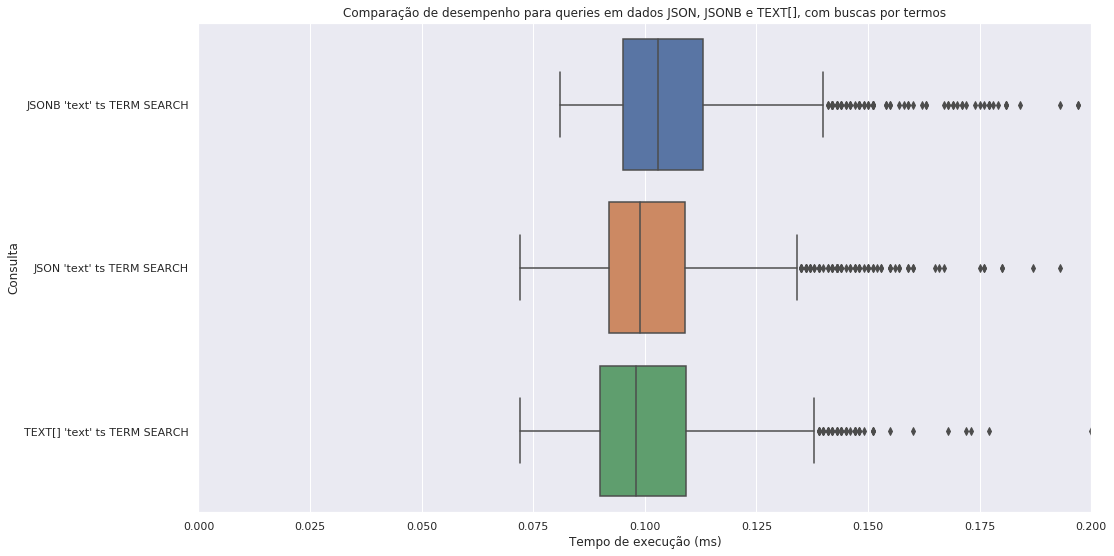

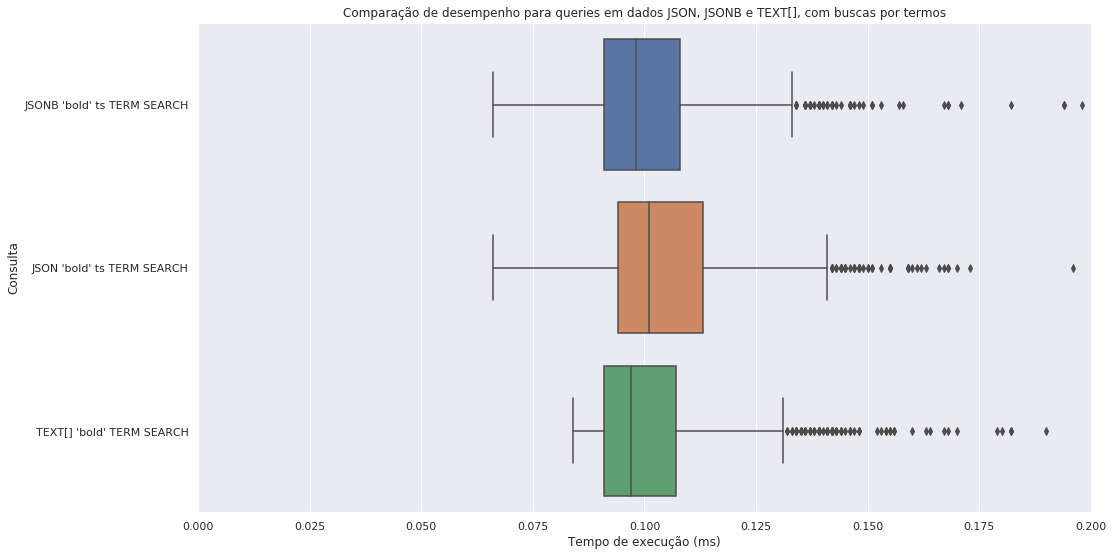

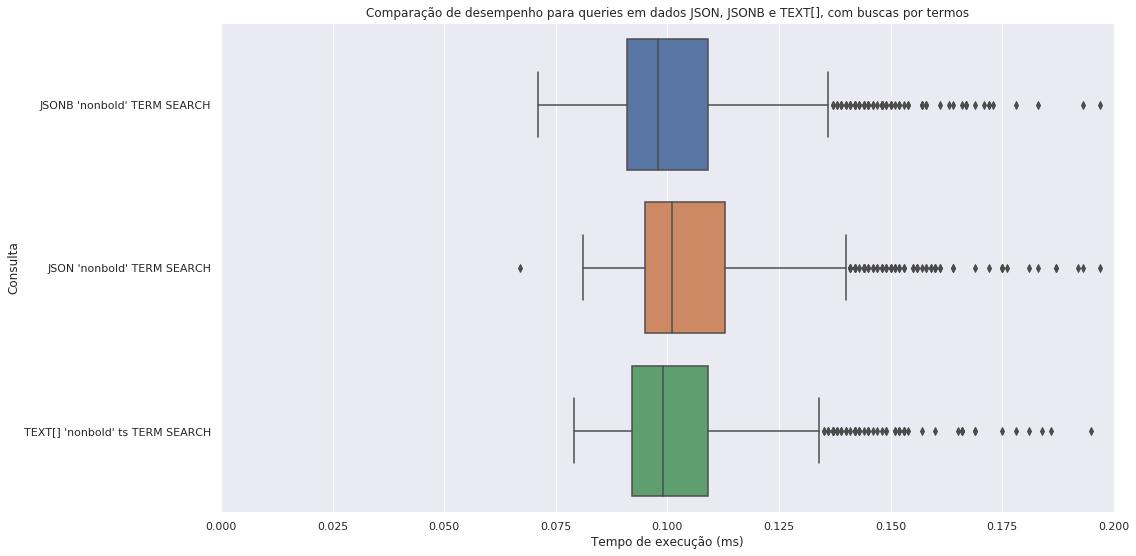

In [27]:
# Graph comparison

sns.set()
plt.figure(figsize=(16, 9))
sns.boxplot(x=times2[0:3], y=labels2[0:3])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[], com buscas por termos")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()
sns.set()

plt.figure(figsize=(16, 9))
sns.boxplot(x=times2[3:6], y=labels2[3:6])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[], com buscas por termos")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()

plt.figure(figsize=(16, 9))
sns.boxplot(x=times2[6:9], y=labels2[6:9])
plt.xlim(0, 0.2)
plt.title("Comparação de desempenho para queries em dados JSON, JSONB e TEXT[], com buscas por termos")
plt.ylabel("Consulta")
plt.xlabel("Tempo de execução (ms)")
plt.plot()